In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt


In [5]:
### using asian paints company's data for analysis

with open('M:/BSE_df/ASIANPAINT.BO.csv','rb') as file:
    df_AP = pickle.load(file)
df_AP.head()    

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


In [6]:
### claculating necessary values to find money flow index

typical_price = (df_AP['High'] + df_AP['Low'] + df_AP['Adj Close']) / 3
raw_mf = typical_price * df_AP['Volume']

In [7]:
money_ratio = []
positive_mf = []
negative_mf = []
positive_mf.append(raw_mf[0])
for i in range(len(raw_mf)-1):
    if raw_mf[i+1] > raw_mf[i]:
        positive_mf.append(raw_mf[i])
        negative_mf.append(0)
    elif raw_mf[i+1] < raw_mf[i]:  
        negative_mf.append(raw_mf[i])
        positive_mf.append(0)
money_ratio = pd.Series(positive_mf).rolling(14).sum()/pd.Series(negative_mf).rolling(14).sum()   

In [8]:
### money flow index

MFI = 100* pd.Series(positive_mf).rolling(14,min_periods = 1).sum()/(pd.Series(positive_mf).rolling(14,min_periods = 1).sum() + pd.Series(negative_mf).rolling(14,min_periods = 1).sum())

In [9]:
MFI


0      100.000000
1      100.000000
2        9.376811
3        8.448512
4        7.839303
5        7.839303
6       10.881879
7       12.896155
8       12.553246
9       12.553246
10      14.154848
11      13.659987
12      13.659987
13      15.191129
14      15.415879
15      17.192653
16      35.434218
17      27.194165
18      28.285566
19      40.114042
20      38.346150
21      40.806674
22      41.530931
23      40.215524
24      39.389072
25      39.341828
26      39.341828
27      38.543612
28      38.029422
29      38.181178
          ...    
752     21.141182
753     21.141182
754     23.816157
755     23.816157
756     35.296162
757     35.296162
758     36.664882
759     39.211378
760     39.211378
761     41.786195
762     39.580358
763     38.211433
764     38.500454
765     35.592453
766     38.215771
767     38.215771
768     38.325312
769     38.135741
770     36.959967
771     36.598157
772     34.478398
773     35.059776
774     37.770188
775     34.048342
776     31

In [72]:
### creating a function wich will show when to buy and when to sell, specific money is given to trade
def buy_sell(df,max,min):
    rs = 200000
    buy_list = []
    sell_list = []
    flag = 0
    num = []
    number = 0
    for i in range(len(MFI)):
        if rs > 0:
            if MFI[i] > max and flag != 0:
                sell_list.append(df_AP['Adj Close'][i])
                buy_list.append(np.nan)
                flag = 0
                rs = rs + df_AP['Adj Close'][i]*number
                number = 0
            elif MFI[i] < min and flag != 1:  
                buy_list.append(df_AP['Adj Close'][i])
                sell_list.append(np.nan)
                flag = 1
                number = int(rs/df_AP['Adj Close'][i])
                rs = rs - df_AP['Adj Close'][i]*number
                print(number,rs)
                num.append(number)
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                rs = rs
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    return buy_list, sell_list,num 

In [76]:
df_AP['buy_price'] = buy_sell(df_AP,50,15)[0]
df_AP['sell_price'] = buy_sell(df_AP,50,15)[1]
num = buy_sell(df_AP,50,15)[2]


178 1059.62109375
198 594.559326171875
150 377.541259765625
123 506.15673828125
178 1059.62109375
198 594.559326171875
150 377.541259765625
123 506.15673828125
178 1059.62109375
198 594.559326171875
150 377.541259765625
123 506.15673828125


In [77]:
df_AP.head()

,High,Low,Open,Close,Volume,Adj Close,buy_price,sell_price
Date,,,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519,NaN,NaN
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445,NaN,NaN
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578,1117.642578,NaN
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421,NaN,NaN
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771,NaN,NaN


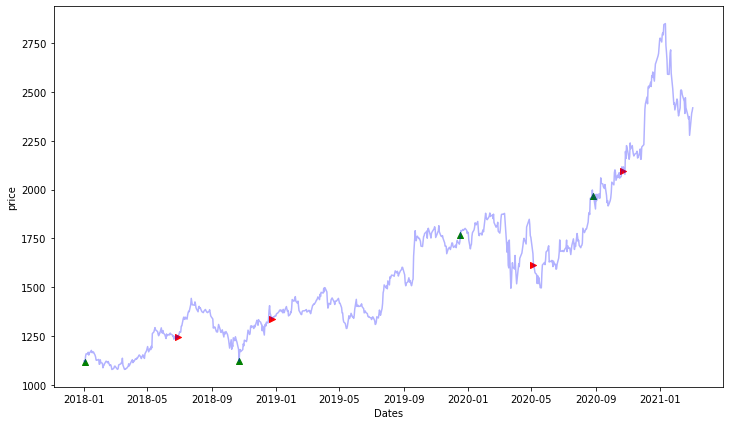

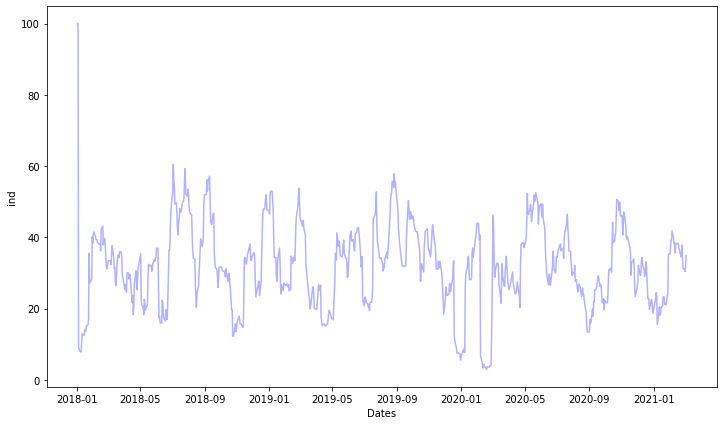

In [78]:
### visualizing buy and sell value with green and red color marker

plt.figure(figsize=(12,7))
plt.plot(df_AP.index,df_AP['Adj Close'],color='blue',alpha = 0.3)
plt.scatter(df_AP.index,df_AP['buy_price'],color='green', marker = '^', alpha = 1)
plt.scatter(df_AP.index,df_AP['sell_price'],color='red', marker = '>', alpha = 1)
plt.xlabel('Dates')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(12,7))
plt.plot(df_AP.index[1:],MFI.dropna(),color='blue',alpha = 0.3)
plt.xlabel('Dates')
plt.ylabel('ind')
plt.show()

In [79]:
buy = pd.Series(buy_sell(df_AP,50,15)[0])
selll =  pd.Series(buy_sell(df_AP,50,15)[1])
buy.dropna(inplace=True)
selll.dropna(inplace=True)

178 1059.62109375
198 594.559326171875
150 377.541259765625
123 506.15673828125
178 1059.62109375
198 594.559326171875
150 377.541259765625
123 506.15673828125


In [83]:
profit = 0
for i in range(len(buy)):
    profit = profit + (selll.values - buy.values)*num[i]

In [84]:
### profit you would make after selling 10 shares, according to the method you are selling 10 shares only throughout the time
profit

207562.51135253906